In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline

In [3]:
import os, sys
import pandas as pd

In [4]:
from ln_utils import *

In [5]:
from datawand.parametrization import ParamHelper
ph = ParamHelper("../", "LNGraph", sys.argv)

['/home/fberes/anaconda3/envs/dm-3-env/lib/python3.5/site-packages/ipykernel/__main__.py', '-f', '/run/user/51880/jupyter/kernel-f4451d79-558a-4b38-9fbc-a34b816278f4.json']
/home/fberes/git/LNDynamicTopology
/home/fberes/git/LNDynamicTopology
Default parameters:
{'data_dir': '/mnt/idms/fberes/data/bitcoin_ln_research', 'min_time': 1548979201, 'time_window': 604800, 'max_time': 1553947199, 'weight': None}
Custom parameters:
{}


# Parameters

time_window = 86400*7

In [6]:
weight_cols = [None, "capacity", "fee_base_msat", "fee_rate_milli_msat"]

In [7]:
snapshot_ids = range(8)

In [8]:
stat_dir = "%s/centrality_scores/" % ph.get("data_dir")
print(stat_dir)

Using default parameter: data_dir=/mnt/idms/fberes/data/bitcoin_ln_research
/mnt/idms/fberes/data/bitcoin_ln_research/centrality_scores/


# Load centrality scores

In [9]:
stats = load_centrality_scores(stat_dir, snapshot_ids, weight_cols, drop_cols=["deg"])

# Results

In [10]:
corr_methods = ["spearman","kendall","wkendall"]

In [11]:
centralities = ["in_deg","out_deg","pr","betw"]

## a.) Cross correlation

   * **deg, in_deg and out_deg** is the same for the unweighted (None) and capacity weighted case - in this case the direction of edges does not matter!  
   * **betw** has lower correlation with other centralities using *fee_base_msat* and *fee_rate_milli_msat* as weights
   * In case of *fee_base_msat* and *fee_rate_milli_msat* weights **deg, in_deg and out_deg** are in conflict: **deg and out_deg** is similar, while **in_deg** is different. The outdegree refers more to global position of a node in the network while in_deg is only a local node policy descriptor! *(so it somewhat makes sense..)*

### i.) between centrality measures

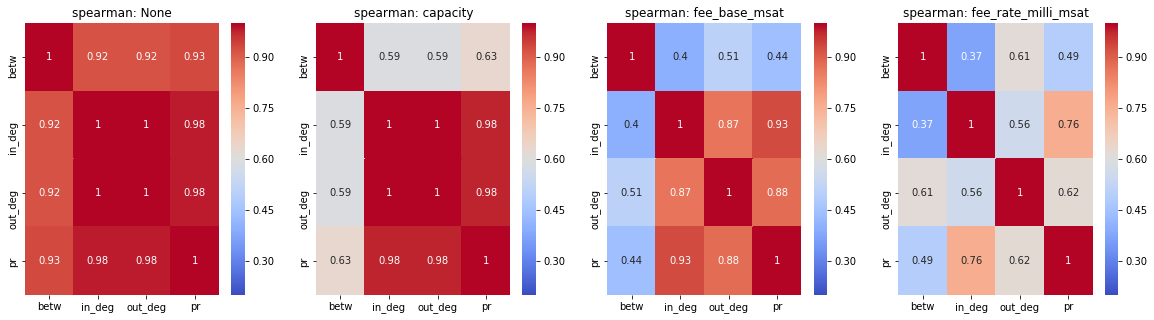

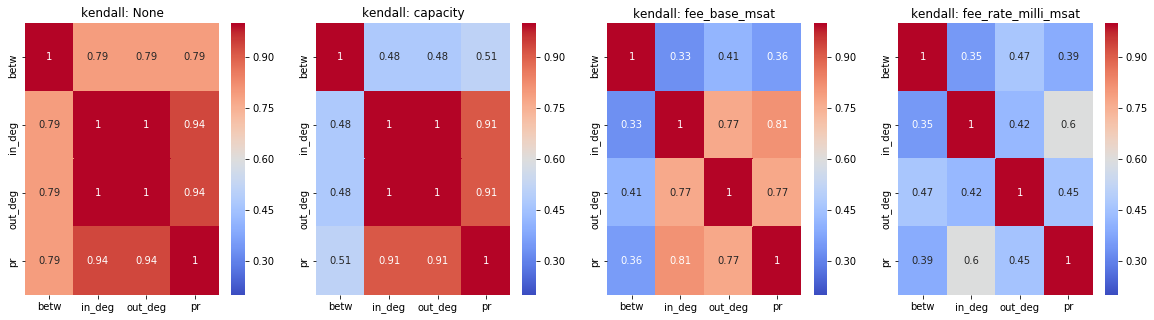

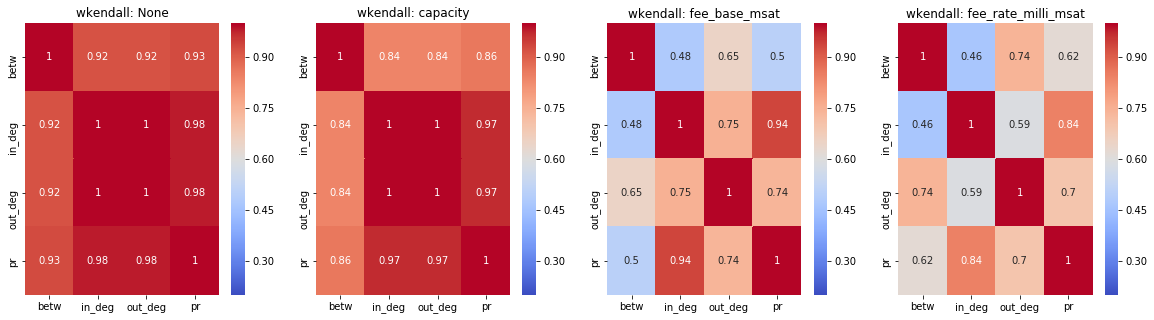

In [12]:
_ = show_mean_cross_correlations(stats, snapshot_ids, weight_cols, corr_methods)

### ii.) between different weights

In [13]:
regrouped_stats = regroup_by_weights(stats, centralities, snapshot_ids, weight_cols)

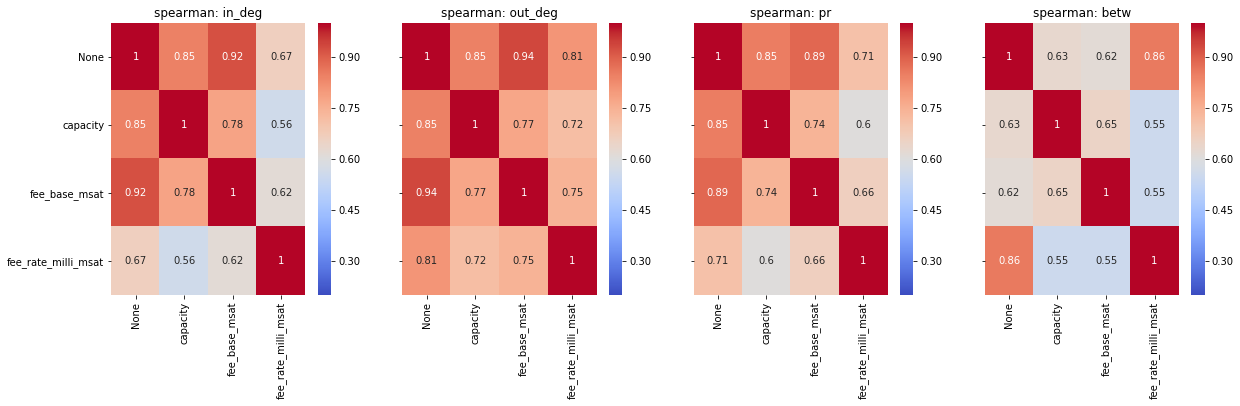

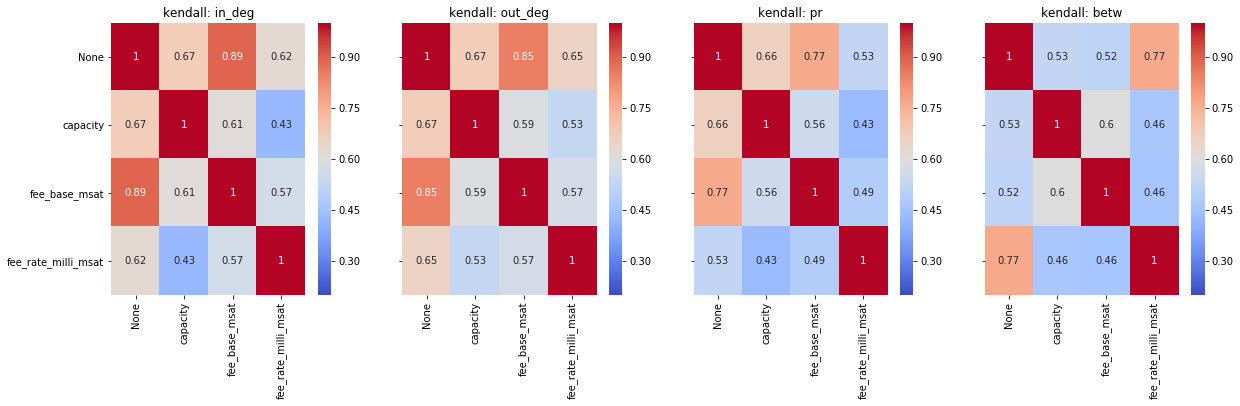

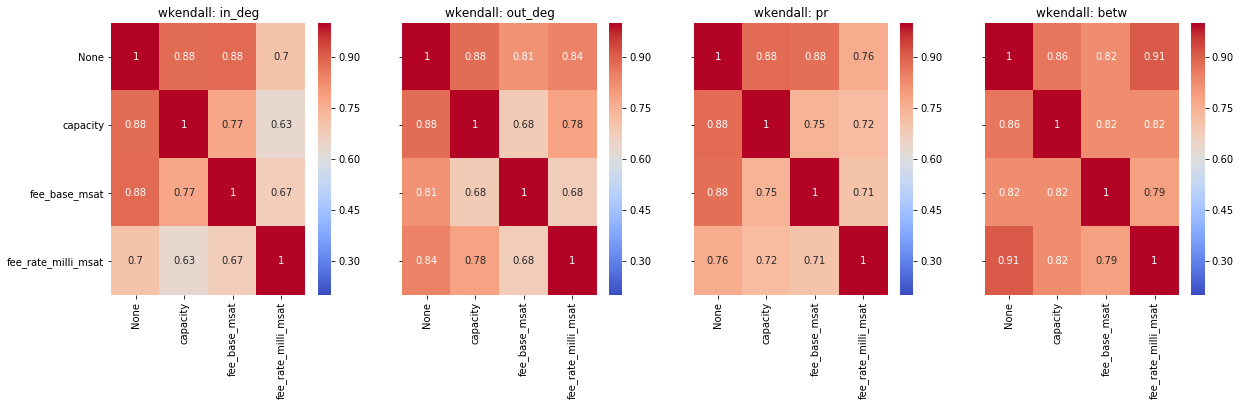

In [14]:
_ = show_mean_cross_correlations(regrouped_stats, snapshot_ids, centralities, corr_methods, sharey=True)

## b.) Correlation time series

### Correlation of centrality measures on adjacent weeks (noisy plots)

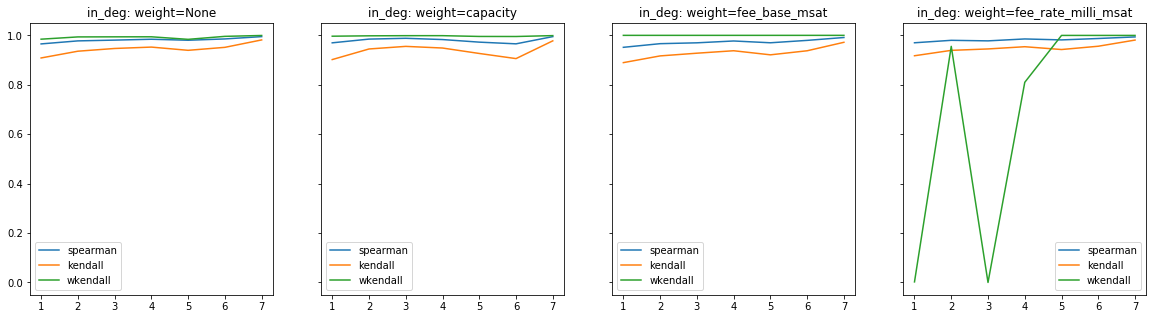

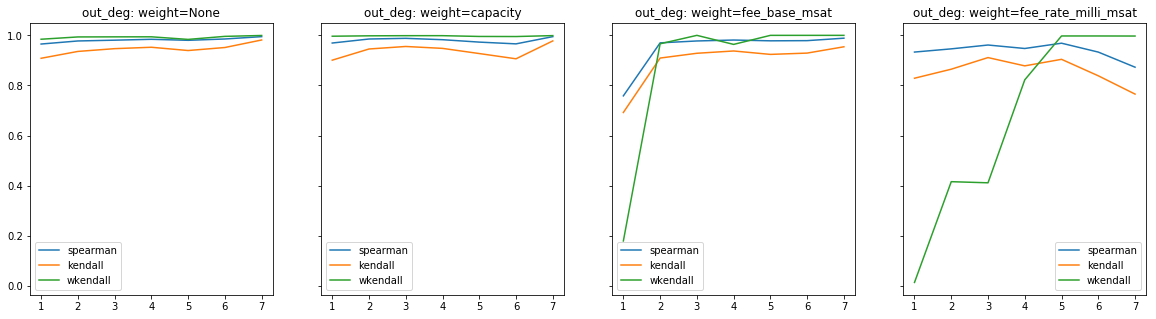

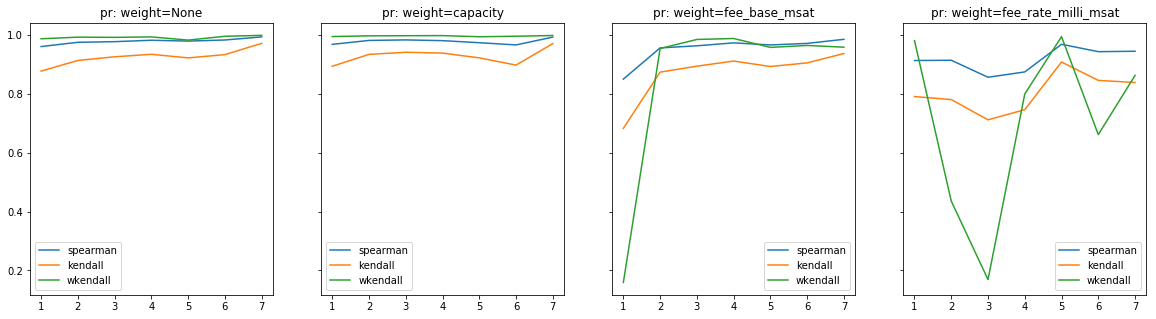

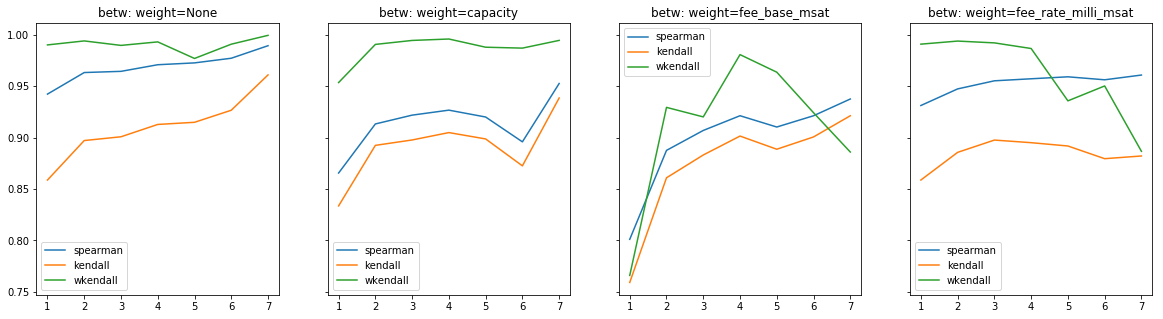

In [15]:
_ = show_corr_time_series(stats, True, weight_cols, centralities=centralities, corr_methods=corr_methods)

### Correlations of first week and current week centrality measures (much better looking plots)

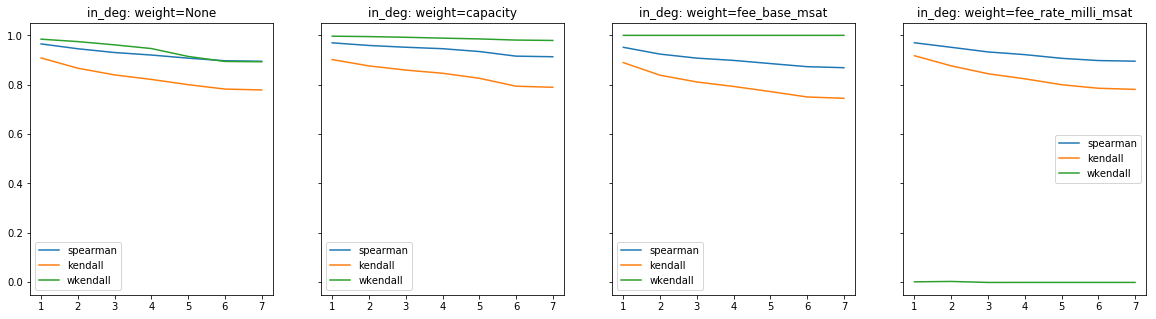

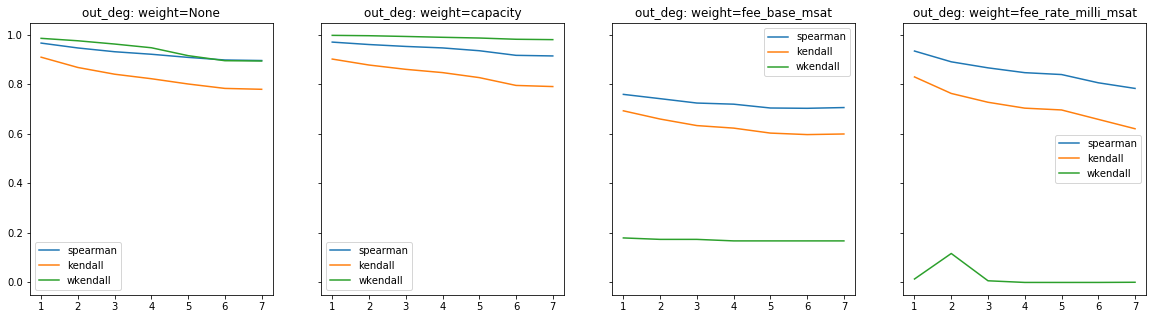

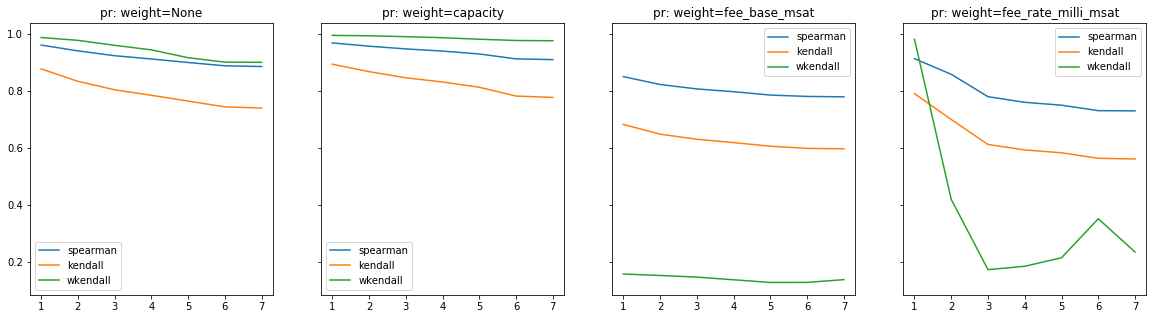

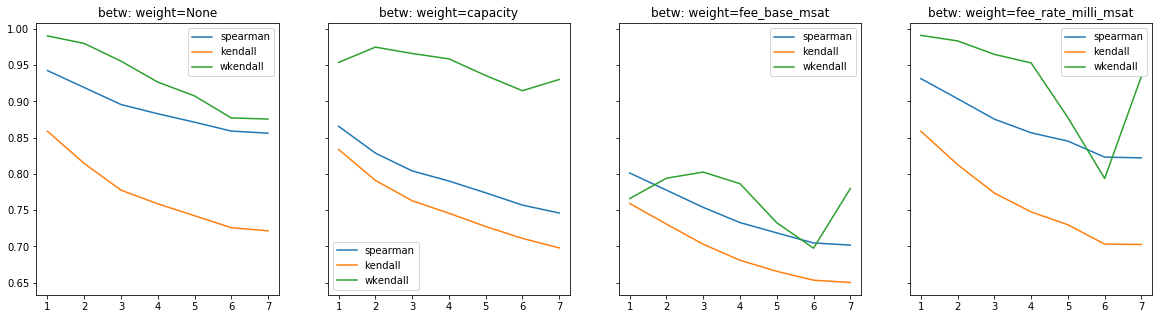

In [16]:
_ = show_corr_time_series(stats, False, weight_cols, centralities=centralities, corr_methods=corr_methods)